In [35]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [36]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [37]:
worksheet = gc.open('vishu dataset').sheet1

In [38]:
rows = worksheet.get_all_values()

In [39]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float'})
df = df.astype({'OUTPUT':'float'})
df

,INPUT,OUTPUT
0,1.0,6.0
1,2.0,11.0
2,3.0,16.0
3,4.0,21.0
4,5.0,26.0
5,6.0,31.0
6,7.0,36.0
7,8.0,41.0
8,9.0,46.0
9,10.0,51.0


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
# To scale
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
X = df[['INPUT']].values
y = df[['OUTPUT']].values

X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)

In [43]:
model = Sequential([
    Dense(5,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [44]:
model.compile(optimizer='rmsprop',loss = 'mse')

In [45]:
model.fit(X_train1,y_train,epochs=5000)

Streaming output truncated to the last 5000 lines.
Epoch 926/5000
1/1 [==============================] - 0s 9ms/step - loss: 1289.0522
Epoch 927/5000
1/1 [==============================] - 0s 10ms/step - loss: 1285.5001
Epoch 928/5000
1/1 [==============================] - 0s 10ms/step - loss: 1281.9486
Epoch 929/5000
1/1 [==============================] - 0s 8ms/step - loss: 1278.3983
Epoch 930/5000
1/1 [==============================] - 0s 10ms/step - loss: 1274.8489
Epoch 931/5000
1/1 [==============================] - 0s 9ms/step - loss: 1271.3003
Epoch 932/5000
1/1 [==============================] - 0s 8ms/step - loss: 1267.7531
Epoch 933/5000
1/1 [==============================] - 0s 8ms/step - loss: 1264.2069
Epoch 934/5000
1/1 [==============================] - 0s 9ms/step - loss: 1260.6616
Epoch 935/5000
1/1 [==============================] - 0s 8ms/step - loss: 1257.1178
Epoch 936/5000
1/1 [==============================] - 0s 8ms/step - loss: 1253.5750
Epoch 937/5000
1/1 [==

<Axes: >

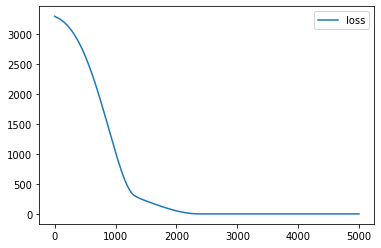

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [47]:
X_test1 = Scaler.transform(X_test)
model.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 105ms/step - loss: 0.0046


0.004631598945707083

In [48]:
from tensorflow.keras.metrics import RootMeanSquaredError as rmse
err = rmse()
preds = model.predict(X_test)
err(y_test,preds)

1/1 [==============================] - 0s 60ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=1122.3079>

In [49]:
## new prediction
X_n1 = [[50]]
X_n1_1 = Scaler.transform(X_n1)
model.predict(X_n1_1)

1/1 [==============================] - 0s 33ms/step


array([[250.81]], dtype=float32)